---
title: Jupyter Add a magic command to create plantuml
tags: 小书匠,jupyter,plantuml,magic
grammar_cjkRuby: true
renderNumberedHeading: true
---

[toc]

# Jupyter Add a magic command to create plantuml

## Install plantuml

First, we need a tool to convert plantuml code into images. Here I find a package called `plantuml` to do this, see [Welcome to plantuml’s documentation! — plantuml 0.1.1 documentation][2] for more details.

In [39]:
!pip install plantuml

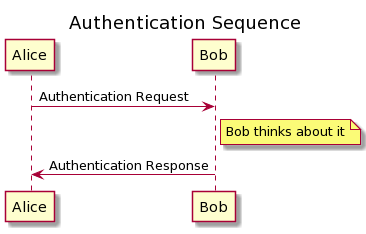

In [40]:
from plantuml import PlantUML
from IPython.display import Image

url = 'http://www.plantuml.com/plantuml/img/'
processor = PlantUML(url)
text = """
title Authentication Sequence

Alice->Bob: Authentication Request
note right of Bob: Bob thinks about it
Bob->Alice: Authentication Response
"""
img = processor.processes(text)
Image(img)

## Create a magic cell

See [Jupyter Custom magic function][1] for details about creating a magic cell

In [47]:
from IPython.display import Image
from io import StringIO
from IPython.core.magic import register_cell_magic

@register_cell_magic
def plantuml(line, cell):
    url = 'http://www.plantuml.com/plantuml/img/'
    processor = PlantUML(url)
    sio = StringIO(cell)
    img = processor.processes(text)
    return Image(img)

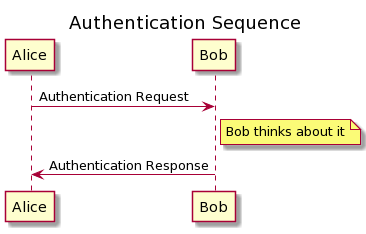

In [48]:
%%plantuml

title Authentication Sequence

Alice->Bob: Authentication Request
note right of Bob: Bob thinks about it
Bob->Alice: Authentication Response

### Auto load the extension

Write the following code into `~/.ipython/extensions/plantuml.py`

In [49]:
%%writefile ~/.ipython/extensions/plantuml.py

from IPython.display import Image
from io import StringIO
from IPython.core.magic import register_cell_magic

@register_cell_magic
def plantuml(line, cell):
    url = 'http://www.plantuml.com/plantuml/img/'
    processor = PlantUML(url)
    sio = StringIO(cell)
    img = processor.processes(text)
    return Image(img)

def load_ipython_extension(ipython):
    ipython.register_magic_function(csv, 'cell')

Overwriting /home/jovyan/.ipython/extensions/plantuml.py


Then add the `c.InteractiveShellApp.extensions = [ 'plantuml' ]` into `~/.ipython/profile_default/ipython_config.py`

In [50]:
%%bash

filename="~/.ipython/profile_default/ipython_config.py"
if [ ! -f $filename ]
then
    mkdir -p $(dirname $filename)
    touch $filename
fi
echo "c.InteractiveShellApp.extensions = [ 'plantuml' ]" >> $filename

# References
- [Jupyter Custom magic function][1]
- [Welcome to plantuml’s documentation! — plantuml 0.1.1 documentation][2]

[1]: evernote:///view/22483756/s54/6030f1b8-e112-4aaf-94bf-08b885202a76/6030f1b8-e112-4aaf-94bf-08b885202a76
[2]: https://pythonhosted.org/plantuml/index.html#plantuml.PlantUML